##### Bayes by backprop: Is  a new, efficient, principled and backpropagation-compatible algorithm for learning a probability distribution on the weights of a neural network It regularises the weights by minimising a compression cost, known as the variational free energy or the expected lower bound on the marginal likelihood. We show that this principled kind of regularisation yields comparable performance to dropout on MNIST classification

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
from keras.models import Sequential, Model
from tensorflow import keras
from keras.layers import Activation, Dense, Flatten,Reshape
tfd = tfp.distributions
from keras.models import Sequential 
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from keras import models
tfb = tfp.bijectors
tfpl = tfp.layers
tfb = tfp.bijectors
import numpy as np
import matplotlib.pyplot as plt 

# Loss function over minibatches

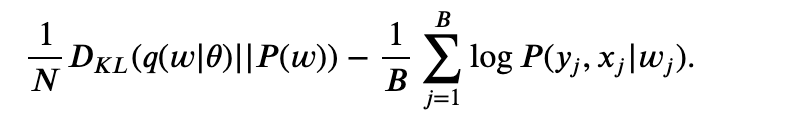

# Reparameterization Trick

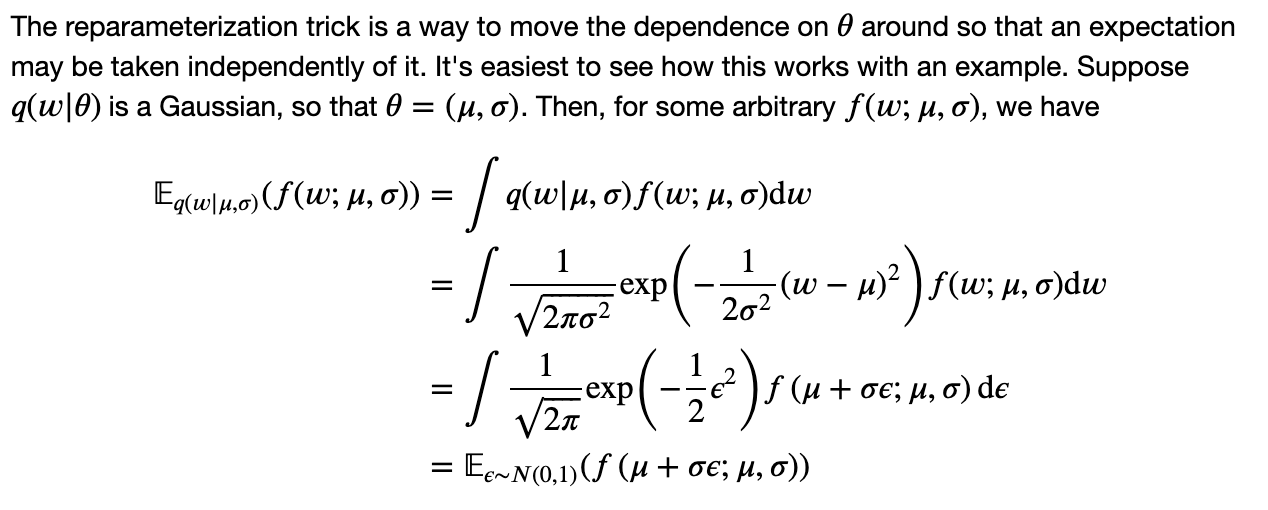

# Create Data

In [3]:
x_train = np.linspace(-1,1,100)[:,np.newaxis]


In [4]:
y_train = x_train+ 0.3 * np.random.randn(100)[:,np.newaxis]

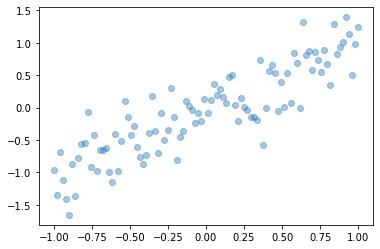

In [7]:
plt.scatter(x_train, y_train, alpha= 0.4)
plt.show()

# Create prior and posterior distribution

In [8]:
def prior(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size # kernels are weights
    prior_model = Sequential([
        tfpl.DistributionLambda(
        lambda t: tfd.MultivariateNormalDiag(loc = tf.zeros(n),
                                            scale_diag=tf.ones(n)))
    ])
    
    return prior_model




In [9]:
def posterior(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size # kernels are weights
    posterior_model = Sequential([
        tfpl.VariableLayer(tfpl.MultivariateNormalTriL.params_size(n), dtype = dtype),
        tfpl.MultivariateNormalTriL(n)
    ])
    
    return posterior_model


# Dense Variational Layer

In [11]:
model = Sequential([
    tfpl.DenseVariational(input_shape = (1,),
                         units = 1,
                         make_prior_fn = prior,
                         make_posterior_fn = posterior,
                         kl_weight = 1/x_train.shape[0],
                         kl_use_exact = True)
])


model.compile(loss = MeanSquaredError(),
             optimizer = RMSprop(learning_rate=0.005))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_variational_1 (DenseVa (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [12]:
model.fit(x_train, y_train, epochs=500, verbose = False)